# RT

In [1]:
from string import punctuation
from collections import Counter
import datetime
import matplotlib.pyplot as plt

In [2]:
import sys

In [3]:
sys.path.append('C:\\projects\\datascience\\proj_news_viz\\nlp\\experiments\\exp-001_Prepare_csv_for_EDA\\scripts')

In [4]:
from reader import CSVCorpusReader

In [5]:
# Создадим объект чтения корпуса
data = CSVCorpusReader('../../../data/interim')

In [6]:
# Новостные источники
data.categories()

['gazeta', 'interfax', 'iz', 'meduza', 'ria', 'rt', 'tass']

In [7]:
# Имеющиеся файлы в корпусе
data.fileids()

['gazeta/gazeta.csv',
 'interfax/interfax.csv',
 'iz/iz.csv',
 'meduza/meduza.csv',
 'ria/ria.csv',
 'rt/rt.csv',
 'tass/tass.csv']

In [8]:
# Проверим размер нашего сета, который будем обрабатывать
list(data.sizes(None, 'rt'))

[(FileSystemPathPointer('C:\\projects\\datascience\\proj_news_viz\\nlp\\data\\interim\\rt\\rt.csv'),
  225108812)]

## Общий предварительный анализ

In [9]:
# Предварительный анализ всех файлов из каталога новостного источника
data.describe(None, 'rt')

{'Количество файлов': 1,
 'Количество источников новостей': 1,
 'Количество обработанных новостей': 106644,
 'Количество предложений': 510836,
 'Количество слов': 19411353,
 'Количество токенов (словарь)': 384046,
 'Коэффициент лексического разнообразия (lexical diversity)': 50.544343646334035,
 'Среднее количество новостей по отношению к файлам': 106644.0,
 'Среднее количество предложений в новостях': 4.790105397396947,
 'Начальная дата в обработке': '2014-06-16 18:36:02',
 'Конечная дата в обработке': '2019-08-02 14:10:00',
 'Количество повторяющихся новостей': 293,
 'Количество пустных новостных элементов': 12,
 'Время обработки в секундах': 459.201534986496}

## EDA

In [10]:
list_data = list(data.docs(None, 'rt'))

In [11]:
# Так выглядет датасет RT
list_data[:5]

[OrderedDict([('date', '2019-06-26 14:00:00'),
              ('url',
               'https://russian.rt.com/russia/news/644595-avto-ekspert-rossiya'),
              ('edition', '-'),
              ('topics', 'Россия'),
              ('authors', ''),
              ('title',
               'Эксперт прокомментировал ситуацию с возможным лишением прав за нечитаемые номера'),
              ('text',
               'Как считает эксперт, россиянам не стоит переживать, что их заподозрят в намеренном загрязнении госзнака в непогоду.n«Когда идёт дождь или снег, то у водителя нет никакого умысла, чтобы номер был грязным, — он сам по себе такой. В теории в идеальной ситуации это должно учитываться инспекторами и судом», —nзаявилnон.nРанее пленум Верховного суда Россииnвыпустил постановлениеn, разъясняющее, какие санкции могут быть применены в отношении автолюбителей, которые приняли меры, чтобы государственные знаки, установленные на их автомобилях, стали нечитаемыми.nРуководитель Федерации автовла

In [0]:
# Можно в пандас загрузить и посмотреть

In [12]:
import pandas as pd

In [13]:
df = pd.DataFrame(list_data)

In [14]:
df.head()

,date,url,edition,topics,authors,title,text,reposts_fb,reposts_vk,reposts_ok,reposts_twi,reposts_lj,reposts_tg,likes,views,comm_count,None
0,2019-06-26 14:00:00,https://russian.rt.com/russia/news/644595-avto...,-,Россия,,Эксперт прокомментировал ситуацию с возможным ...,"Как считает эксперт, россиянам не стоит пережи...",-,-,-,-,-,-,-,-,-,[]
1,2019-06-26 19:56:00,https://russian.rt.com/sport/article/644740-nu...,-,Спорт,,"Встреча Нурмагомедова с Макгрегором, восстанов...",«Конор может посетить поединок Хабиба с Порье»...,-,-,-,-,-,-,-,-,-,[]
2,2019-06-26 14:52:00,https://russian.rt.com/russia/news/644619-puti...,-,Россия,,Путин подарил Зюганову на юбилей материалы съе...,"Открывая заседание Госсовета в Кремле, Путин п...",-,-,-,-,-,-,-,-,-,[]
3,2019-06-26 14:44:00,https://russian.rt.com/world/news/644618-parla...,-,Мир,,"Парламентарии США, ФРГ и России проведут встре...",Об этом информируетnРИА Новостиnсо ссылкой на ...,-,-,-,-,-,-,-,-,-,[]
4,2019-06-26 14:42:00,https://russian.rt.com/sport/news/644617-mok-a...,-,Спорт,,МОК принял решение лишить признания AIBA,Решением 134-й сессии МОК в швейцарской Лозанн...,-,-,-,-,-,-,-,-,-,[]


### Обработка словаря

In [15]:
# Соберем токены
tokens = data.gettokens

In [16]:
punctuation = list(punctuation)

In [17]:
punctuation += ['«','»','—', 'n','»,','».', '–', '...']

In [18]:
garbage_words = ['nранее', 'nв', 'nпо', 'nтакже','u','n—', 'nn']

In [19]:
tokens = {item:tokens[item] for item in tokens if item not in punctuation}

In [20]:
tokens = {item:tokens[item] for item in tokens if item not in garbage_words}

In [22]:
stopwords_01 = open('../../../data/another/stopwords.txt', 'r', encoding='UTF-8')
stopwords_01 = stopwords_01.read().split('\n')
stopwords_02 = open('../../../data/another/stopwords_02.txt', 'r', encoding='UTF-8')
stopwords_02 = stopwords_02.read().split('\n')

In [23]:
stopwords = stopwords_01 + stopwords_02

In [24]:
tokens_without_stopwords = {item:tokens[item] for item in tokens if item not in stopwords}

### Аналитика по словам

#### Топ-20 слов без удаления стоп-слов

In [25]:
Counter(tokens).most_common(20)

[('в', 656403),
 ('и', 339005),
 ('на', 276070),
 ('что', 230565),
 ('с', 171243),
 ('по', 162915),
 ('не', 150149),
 ('ранее', 73704),
 ('о', 63981),
 ('как', 63264),
 ('он', 62068),
 ('для', 59815),
 ('это', 59210),
 ('к', 56653),
 ('россии', 56185),
 ('из', 55137),
 ('за', 54938),
 ('а', 52405),
 ('также', 49500),
 ('его', 46686)]

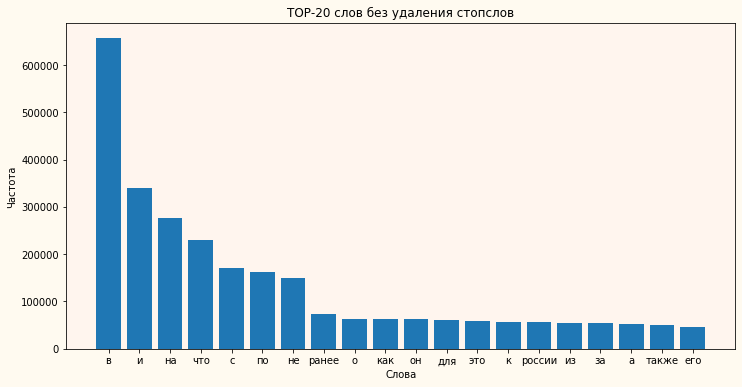

In [26]:
x = dict(Counter(tokens).most_common(20)).keys()
y = dict(Counter(tokens).most_common(20)).values()

fig, ax = plt.subplots()

ax.bar(x, y)
ax.set_title('TOP-20 слов без удаления стопслов')
ax.set_ylabel('Частота')
ax.set_xlabel('Слова')

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure


plt.show()

#### Топ-20 слов после удаления стоп-слов

In [27]:
Counter(tokens_without_stopwords).most_common(20)

[('россии', 56185),
 ('сша', 38624),
 ('заявил', 30197),
 ('сообщалось', 23040),
 ('словам', 22485),
 ('новости', 21864),
 ('отметил', 21257),
 ('риа', 21067),
 ('сообщает', 18260),
 ('отмечается', 16484),
 ('украины', 16193),
 ('1', 16054),
 ('2', 16037),
 ('rt', 15362),
 ('слова', 15296),
 ('приводит', 15146),
 ('страны', 13892),
 ('цитирует', 13827),
 ('мая', 13049),
 ('решение', 12689)]

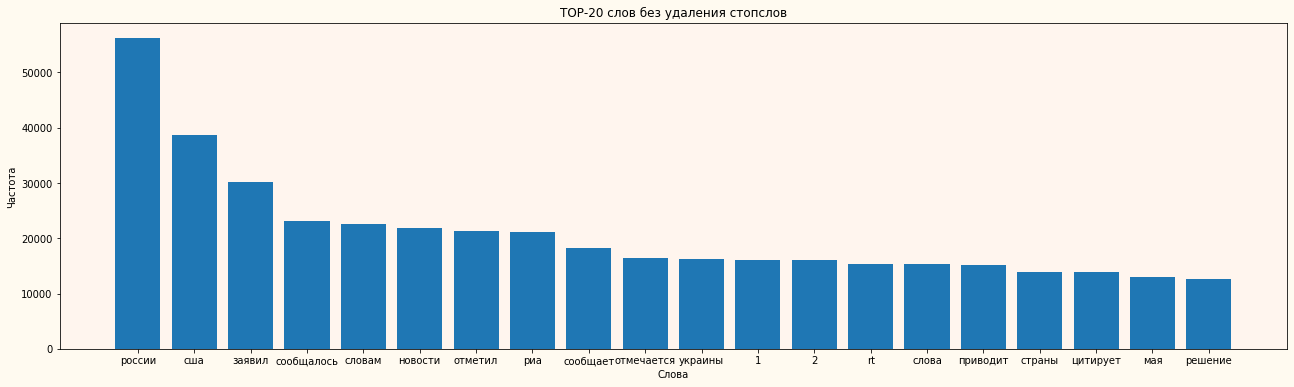

In [49]:
x = dict(Counter(tokens_without_stopwords).most_common(20)).keys()
y = dict(Counter(tokens_without_stopwords).most_common(20)).values()

fig, ax = plt.subplots()

ax.bar(x, y)
ax.set_title('TOP-20 слов без удаления стопслов')
ax.set_ylabel('Частота')
ax.set_xlabel('Слова')

ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(22)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure


plt.show()

## Рубрики в разрезе новостей

### Количество рубрик

In [50]:
list_topics = list(data.listcolumns(None, 'rt', 'topics'))

In [51]:
len(set(list_topics))

10

### Рубрики в разрезе количества новостей

In [52]:
Counter(list_topics).most_common(10)

[('Россия', 32963),
 ('Спорт', 26702),
 ('Мир', 26476),
 ('Бывший СССР', 10078),
 ('Без политики', 4489),
 ('Экономика', 4321),
 ('Наука', 1496),
 ('Пресс-релизы', 92),
 ('Новости партнёров', 14),
 ('Мероприятия RT', 13)]

## Распределение количества новостей по месяцам

In [53]:
list_dates = list(data.listcolumns(None, 'rt', 'date'))

In [55]:
def getMonthDate(date):
  """
  Возвращает дату в формате ММ-ГГГГ
  """
  date = datetime.datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
  return '-'.join(['0' + str(date.month) if date.month<10 else str(date.month), str(date.year)])

In [56]:
# Подсчет количества новостей в разрезе месяца и года
list_dates = [getMonthDate(x) for x in list_dates]

In [57]:
month_year = Counter(list_dates)

In [58]:
len(month_year)

33

In [59]:
month_year.most_common(33)

[('12-2017', 8282),
 ('05-2019', 8270),
 ('11-2018', 8149),
 ('05-2018', 8102),
 ('11-2017', 7800),
 ('06-2019', 7546),
 ('06-2017', 7009),
 ('05-2017', 6092),
 ('10-2018', 5245),
 ('12-2018', 4477),
 ('06-2018', 4311),
 ('10-2016', 4018),
 ('07-2017', 3757),
 ('04-2018', 2616),
 ('09-2016', 2353),
 ('08-2016', 2260),
 ('08-2015', 2210),
 ('07-2015', 2098),
 ('06-2015', 2022),
 ('07-2016', 1939),
 ('04-2019', 1921),
 ('12-2014', 1657),
 ('11-2014', 1391),
 ('09-2015', 1237),
 ('10-2014', 1037),
 ('11-2016', 426),
 ('09-2014', 401),
 ('07-2019', 13),
 ('08-2018', 1),
 ('09-2017', 1),
 ('08-2019', 1),
 ('08-2017', 1),
 ('06-2014', 1)]

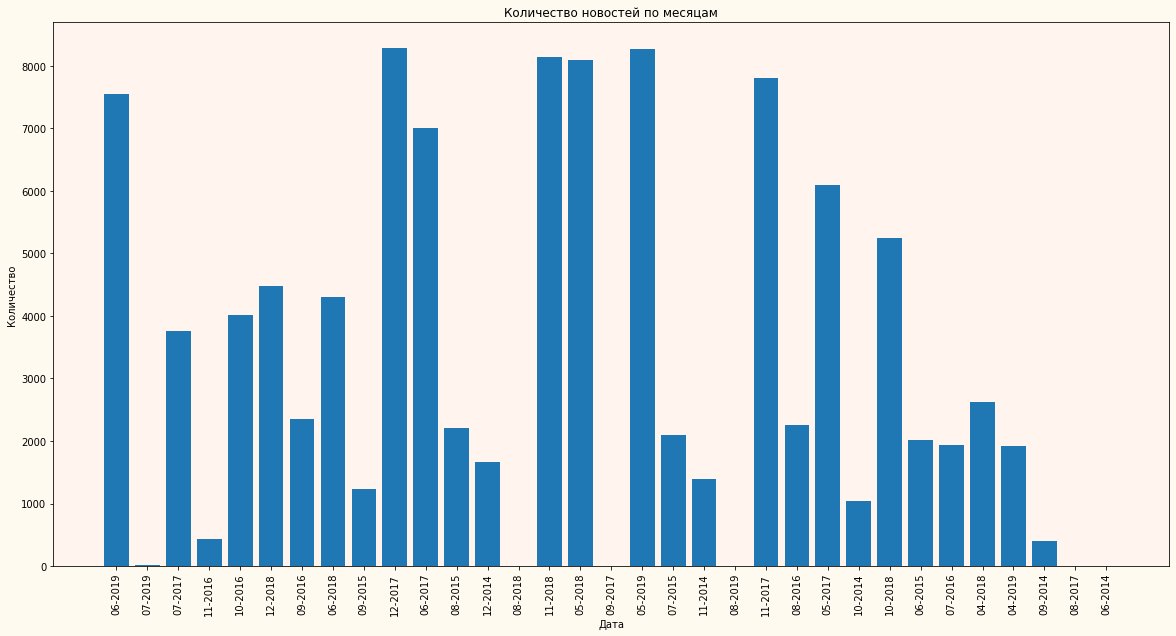

In [60]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(x = month_year.keys(),
        height = month_year.values())
plt.xticks(rotation='vertical')
ax.set_facecolor('seashell')
fig.set_facecolor('floralwhite')

ax.set_title('Количество новостей по месяцам')
ax.set_ylabel('Количество')
ax.set_xlabel('Дата')
plt.show()